## **LOADING AND PREPROCESSING DATA**

In [ ]:
import pandas as pd
df= pd.read_csv("/content/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
d= pd.read_csv('/content/Student_Performance.csv')


In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


# **Visualization**

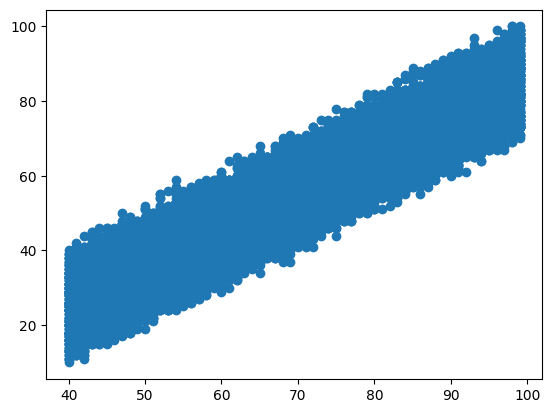

In [ ]:
score= df['Previous Scores']
perf = df['Performance Index']
plt.scatter(score,perf)

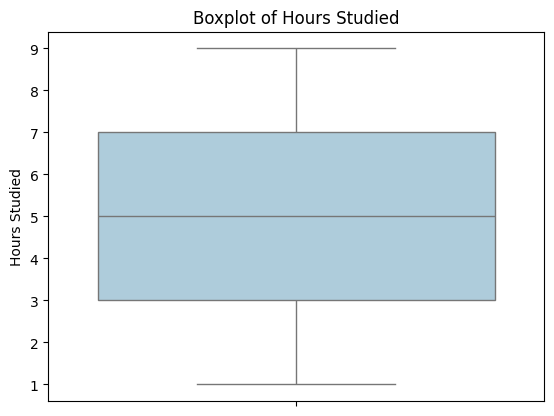

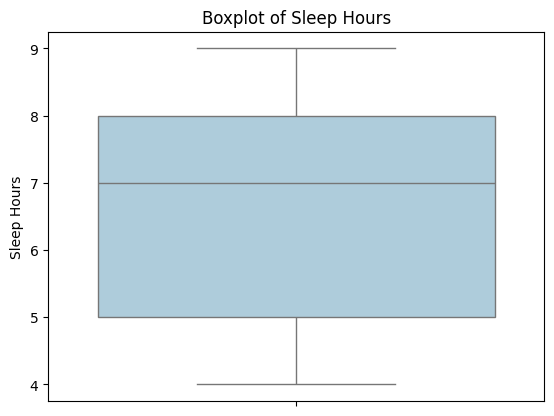

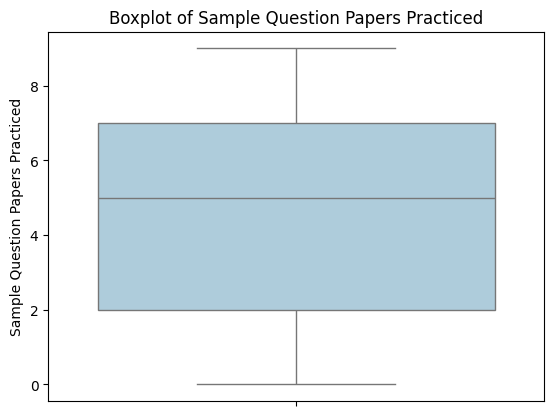

In [ ]:
cols=['Hours Studied','Sleep Hours','Sample Question Papers Practiced']
for col in cols:
  sns.boxplot(df[col],patch_artist=True)
  plt.title(f'Boxplot of {col}')
  plt.show()



In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

<ipython-input-37-b07467a1643b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=p, data=df, palette="colorblind", alpha=0.8)


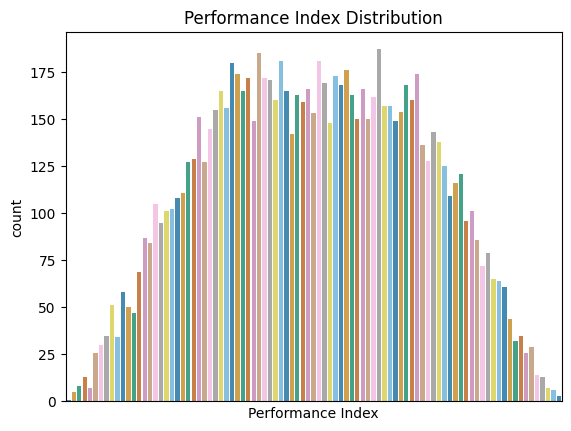

In [ ]:
import seaborn as sns
p= df['Performance Index']
sns.countplot(x=p, data=df, palette="colorblind", alpha=0.8)
plt.xticks([])
plt.title('Performance Index Distribution')
plt.show()

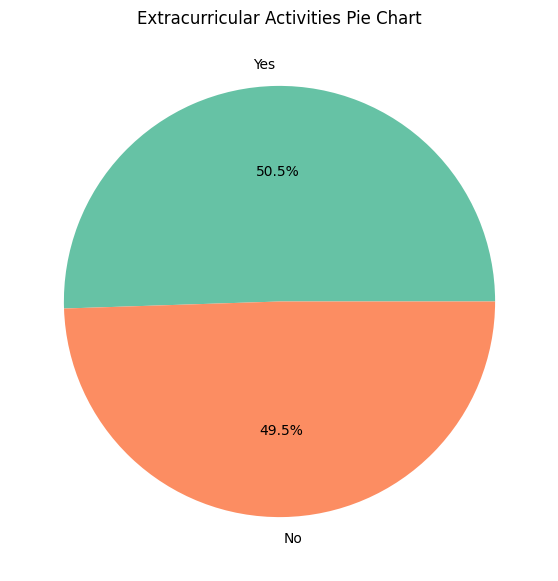

In [ ]:
plt.figure(figsize=(7,7))
palette = sns.color_palette('Set2')
sns.set_palette(palette)
labels=d['Extracurricular Activities'].unique()
plt.pie(df['Extracurricular Activities'].value_counts(),labels=labels,autopct= '%1.1f%%' )
plt.title('Extracurricular Activities Pie Chart')
plt.show()

# **MODELING**


## **SIMPLE LINEAR REGRESSION**

In [ ]:
import pandas as pd
df= pd.read_csv("Student_Performance.csv")

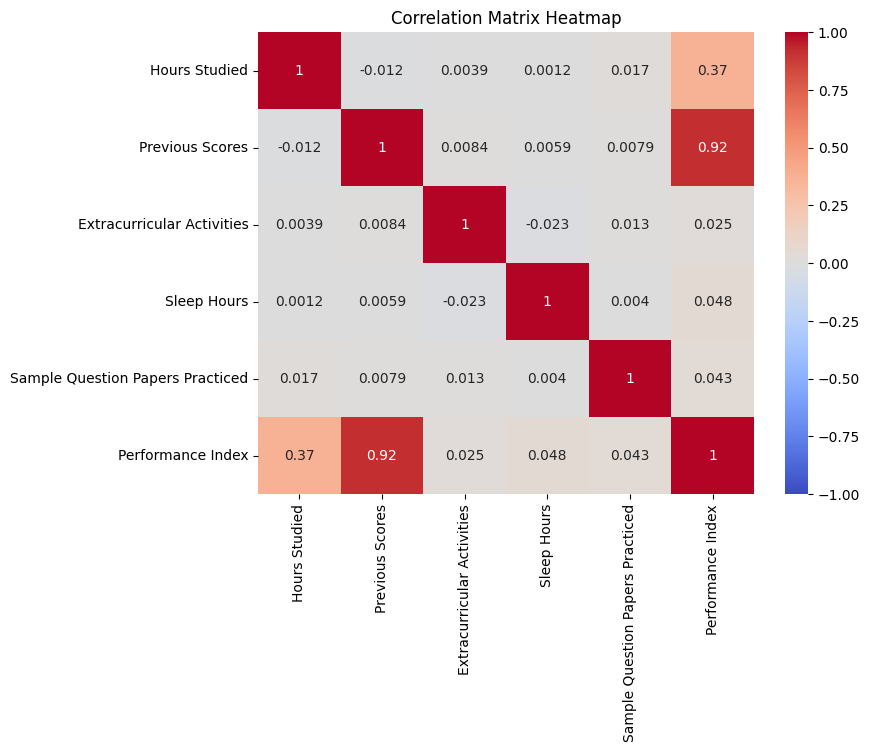

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()




*   FEATURE --- > PREVIOUS SCORE
*   RESPONSE --- > PERFORMANCE INDEX



In [ ]:
#x--->PREVIOUS SCORE
x=df['Previous Scores']
y=df['Performance Index']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
import numpy as np

x_train_array = x_train.to_numpy().reshape(-1, 1)
y_train_array = y_train.to_numpy().reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_array, y_train_array)

if isinstance(x_test, np.ndarray):
    x_test_array = x_test.reshape(-1, 1)
else:
    x_test_array = x_test.to_numpy().reshape(-1, 1)
lr_pred = lr.predict(x_test_array)

print(lr_pred)

[[64.99663906]
 [58.91694353]
 [27.50518328]
 ...
 [36.62472658]
 [63.98335648]
 [25.47861811]]


In [ ]:
#MANUAL IMPLEMENTATION OF BETA O AND BETA1

x_mean = np.mean(x_train_array)
y_mean = np.mean(y_train_array)

sxy=np.sum((x_train_array-x_mean)*(y_train_array-y_mean))
sxx=np.sum((x_train_array-x_mean)**2)
beta_1 = sxy /sxx
beta_0=y_mean-(beta_1*x_mean)

print("Slope (beta_1):",beta_1)
print("Intercept (beta_0):",beta_0)
print(f"Equation:y={beta_1:.2f}x+{beta_0:.2f}")

Slope (beta_1): 1.013282588624993
Intercept (beta_0): -15.052685437559589
Equation:y=1.01x+-15.05


In [ ]:
beta_0 = lr.intercept_[0]
beta_1 = lr.coef_[0][0]

print("Slope (beta_1):", beta_1)
print("Intercept (beta_0):", beta_0)
print(f"Equation: y = {beta_1:.2f}x + {beta_0:.2f}")

Slope (beta_1): 1.013282588624993
Intercept (beta_0): -15.052685437559589
Equation: y = 1.01x + -15.05


In [ ]:
#MANUAL IMPLEMENTATION OF REGRESSION METRICS

import numpy as np

y_test = np.squeeze(y_test)
lr_pred = np.squeeze(lr_pred)

mse=np.mean((y_test-lr_pred)**2)
print("Mean Squared Error:",mse)

mae=np.mean(np.abs(y_test-lr_pred))
print("Mean Absolute Error:",mae)

rmse=np.sqrt(np.mean((y_test-lr_pred)**2))
print("Root Mean Square Error:",rmse)

r2=1-(np.sum((y_test-lr_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
print("R2 Score:", r2)

Mean Squared Error: 58.984151103207694
Mean Absolute Error: 6.4971248147649545
Root Mean Square Error: 7.680114003268942
R2 Score: 0.8415119334197925


In [ ]:
from sklearn.metrics import *

print('Mean Squared Error:',mean_squared_error(y_test,lr_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,lr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,lr_pred)))
print('R2 Score:',r2_score(y_test,lr_pred))

Mean Squared Error: 58.984151103207694
Mean Absolute Error: 6.4971248147649545
Root Mean Squared Error: 7.680114003268942
R2 Score: 0.8415119334197925


In [ ]:
import numpy as np
n = len(y_test)
residuals=y_test-lr_pred
y_mean=np.mean(y_test)
SST=np.sum((y_test-y_mean)**2)
SSE=np.sum(residuals**2)
SSR=np.sum((lr_pred-y_mean)**2)
MSE=SSE/(n-2)
MSR=SSR/1
MST=SST/(n-1)

print("SST:", SST)
print("SSE:", SSE)
print("SSR:", SSR)
print("MSE:", MSE)
print("MSR:", MSR)
print("MST:", MST)

print("R-squared:", 1 - (SSE / SST))
print("Adjusted R-squared:", 1 - (SSE / SST) * ((n - 1) / (n - 2)))

SST: 744335.5499999999
SSE: 117968.30220641539
SSR: 624857.7629218269
MSE: 59.0431942975052
MSR: 624857.7629218269
MST: 372.35395197598797
R-squared: 0.8415119334197925
Adjusted R-squared: 0.8414326100631457


In [ ]:
previous_score_input = input("Enter the previous score: ")
if previous_score_input.strip():
    try:
        previous_score = float(previous_score_input)
        performance_index = beta_0 + beta_1 * previous_score
        print(f"Performance Index: {performance_index:.2f}")
    except ValueError:
        print("Invalid input. Please enter a valid numeric value for the previous score.")
else:
    print("No input provided for the previous score. Skipping performance index calculation.")

Enter the previous score: 89
Performance Index: 75.13


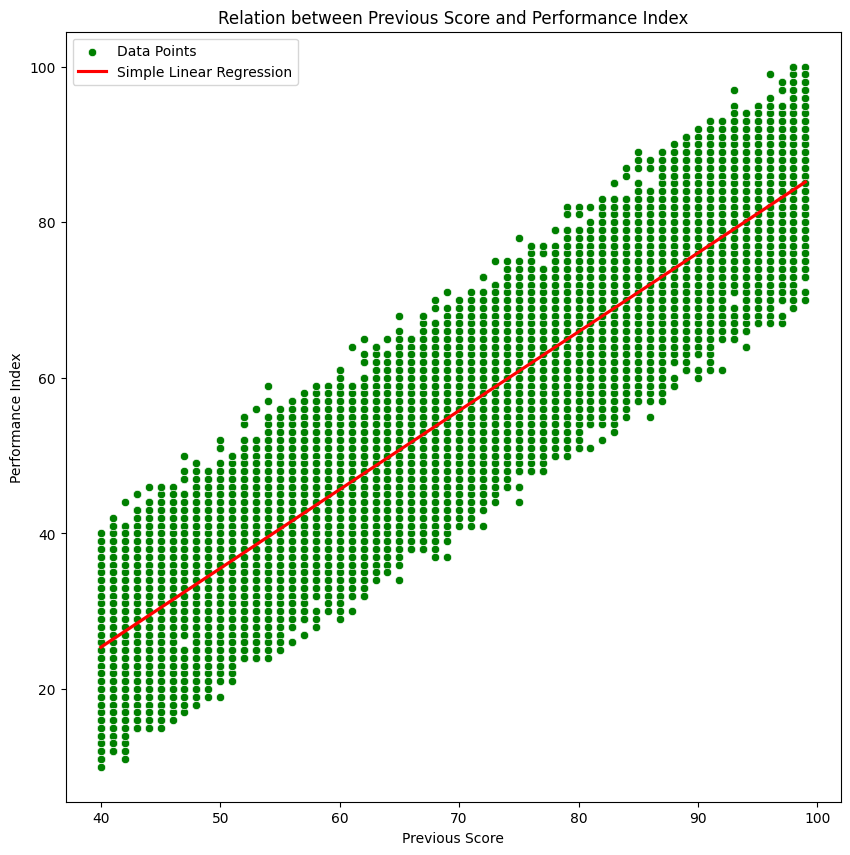

In [ ]:
prev_score = df['Previous Scores']
per = df['Performance Index']
plt.figure(figsize=(10, 10))
sns.scatterplot(x=prev_score, y=per, color='green', label='Data Points')
sns.regplot(x=prev_score, y=per, scatter=False, color='red', label='Simple Linear Regression')
plt.xlabel('Previous Score')
plt.ylabel('Performance Index')
plt.title('Relation between Previous Score and Performance Index')
plt.legend()
plt.show()

# **T TEST**

In [ ]:
def mean(a):
    return sum(a) / len(a)

def variance(a):
    mu = mean(a)
    return sum((x - mu) ** 2 for x in a) / len(a)

def covariance(x, y):
    mu_x = mean(x)
    mu_y = mean(y)
    return sum((x[i] - mu_x) * (y[i] - mu_y) for i in range(len(x))) / len(x)

def coefficients(x, y):
    b1 = covariance(x, y) / variance(x)
    b0 = mean(y) - b1 * mean(x)
    return b0, b1

import numpy as np
from scipy.stats import t

previous_score = df['Previous Scores'].values
performance_index = df['Performance Index'].values

b0, b1 = coefficients(previous_score, performance_index)

y_predicted = b0 + b1 * previous_score
residuals = performance_index - y_predicted

std_error_b1 = np.std(residuals, ddof=1) / np.sqrt(len(residuals))

t_value_b1 = b1 / std_error_b1

df = len(previous_score) - 2

alpha = 0.05

critical_value = t.ppf(1 - alpha / 2, df)

print("Null Hypothesis: b1 = 0")
print("Alternative Hypothesis: b1 != 0")
print(" ")
print("b0 (intercept):", b0)
print("b1 (slope):", b1)
print(" ")
print("t-statistic:", np.abs(t_value_b1))
print("Critical t-value:", critical_value)

if np.abs(t_value_b1) > critical_value:
    print("Reject null hypothesis: Previous Scores influences Performance Index ")
else:
    print("Fail to reject null hypothesis:Previous Scores does not influences Performance Index ")

Null Hypothesis: b1 = 0
Alternative Hypothesis: b1 != 0
 
b0 (intercept): -15.18179942712689
b1 (slope): 1.0138367015830625
 
t-statistic: 13.093364438806002
Critical t-value: 1.9602012873568364
Reject null hypothesis: Previous Scores influences Performance Index 


## **MUTIPLE LINEAR REGRESSION**

In [ ]:
x=df.drop('Performance Index',axis=1)

In [ ]:
y=df['Performance Index']

In [ ]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [ ]:
x_intercept=np.c_[np.ones(x.shape[0]), x]

In [ ]:
x_intercept

array([[ 1.,  7., 99.,  1.,  9.,  1.],
       [ 1.,  4., 82.,  0.,  4.,  2.],
       [ 1.,  8., 51.,  1.,  7.,  2.],
       ...,
       [ 1.,  6., 83.,  1.,  8.,  5.],
       [ 1.,  9., 97.,  1.,  7.,  0.],
       [ 1.,  7., 74.,  0.,  8.,  1.]])

In [ ]:
x=x_intercept

In [ ]:
x_intercept.shape

(10000, 6)

In [ ]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [ ]:
import numpy as np
x_transpose=np.transpose(x)

In [ ]:
x_transpose

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 7.,  4.,  8., ...,  6.,  9.,  7.],
       [99., 82., 51., ..., 83., 97., 74.],
       [ 1.,  0.,  1., ...,  1.,  1.,  0.],
       [ 9.,  4.,  7., ...,  8.,  7.,  8.],
       [ 1.,  2.,  2., ...,  5.,  0.,  1.]])

In [ ]:
xTx=np.dot(x_transpose,x)

In [ ]:
xTx

array([[1.0000000e+04, 4.9929000e+04, 6.9445700e+05, 4.9480000e+03,
        6.5306000e+04, 4.5833000e+04],
       [4.9929000e+04, 3.1632900e+05, 3.4617910e+06, 2.4755000e+04,
        3.2612100e+05, 2.3013600e+05],
       [6.9445700e+05, 3.4617910e+06, 5.1234601e+07, 3.4434300e+05,
        4.5369690e+06, 3.1868270e+06],
       [4.9480000e+03, 2.4755000e+04, 3.4434300e+05, 4.9480000e+03,
        3.2116000e+04, 2.2866000e+04],
       [6.5306000e+04, 3.2612100e+05, 4.5369690e+06, 3.2116000e+04,
        4.5524400e+05, 2.9951100e+05],
       [4.5833000e+04, 2.3013600e+05, 3.1868270e+06, 2.2866000e+04,
        2.9951100e+05, 2.9227500e+05]])

In [ ]:
xTx_inv=np.linalg.inv(xTx)

In [ ]:
xTx_inv

array([[ 3.89164749e-03, -7.50332836e-05, -2.29799670e-05,
        -2.03718091e-04, -2.26603752e-04, -5.24721781e-05],
       [-7.50332836e-05,  1.49239323e-05,  2.80021534e-08,
        -2.92099686e-07, -3.04892629e-08, -2.35944255e-07],
       [-2.29799670e-05,  2.80021534e-08,  3.32605078e-07,
        -9.75576296e-08, -2.08338091e-08, -1.60383474e-08],
       [-2.03718091e-04, -2.92099686e-07, -9.75576296e-08,
         4.00364024e-04,  2.76106121e-06, -9.12013503e-07],
       [-2.26603752e-04, -3.04892629e-08, -2.08338091e-08,
         2.76106121e-06,  3.47954469e-05, -8.69500689e-08],
       [-5.24721781e-05, -2.35944255e-07, -1.60383474e-08,
        -9.12013503e-07, -8.69500689e-08,  1.21709508e-05]])

In [ ]:
xTy=np.dot(x_transpose,y)

In [ ]:
xTy

array([  552248.,  2943221., 41400412.,   275608.,  3622183.,  2554952.])

In [ ]:
beta=np.dot(xTx_inv,xTy)

In [ ]:
print('intercept (beta0):',beta[0])
print('coefficients (beta1,beta2,beta3):',beta[1:])

intercept (beta0): -34.075588091913346
coefficients (beta1,beta2,beta3): [2.85298205 1.01843419 0.61289758 0.48055975 0.19380214]


In [ ]:
#example
new_stud=np.array([1,4,80,0,4,4])
pred=np.dot(new_stud,beta)

In [ ]:
print("Prediction:", "{:.2f}".format(pred))

Prediction: 61.51


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
reg=LinearRegression()
model=reg.fit(x_train,y_train)
pred=reg.predict(x_test)

In [ ]:
r2=print('R2 score:',r2_score(pred,y_test))
r2

R2 score: 0.9884131786319773


In [ ]:
pd.DataFrame({'Actual Performance':y_test,'Predicted Performance': pred})

,Actual Performance,Predicted Performance
9953,58.0,61.174499
3850,64.0,63.797871
4962,75.0,77.761058
3886,59.0,63.440671
5437,86.0,86.403468
...,...,...
3919,60.0,62.291348
162,36.0,36.661654
7903,67.0,64.392804
2242,33.0,29.787323


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## example
predictedindex=model.predict([[4,80,0,4,4]])
print('predicted performance',predictedindex)

predicted performance [61.54289205]


# **F TEST**

In [ ]:
import numpy as np
from scipy.stats import f

x = df[['Previous Scores','Sleep Hours']]  # Assuming you have multiple predictors
y = df['Performance Index']

n = len(x)

mean_x1 = np.mean(x['Previous Scores'])
mean_x2 = np.mean(x['Sleep Hours'])
mean_y = np.mean(y)

beta1 = np.sum((x['Previous Scores'] - mean_x1) * (y - mean_y)) / np.sum((x['Previous Scores'] - mean_x1)**2)
beta2 = np.sum((x['Sleep Hours'] - mean_x2) * (y - mean_y)) / np.sum((x['Sleep Hours'] - mean_x2)**2)
beta0 = mean_y - beta1 * mean_x1 - beta2 * mean_x2

y_hat = beta0 + beta1 * x['Previous Scores'] + beta2 * x['Sleep Hours']

residuals = y - y_hat

sst = np.sum((y - mean_y)**2)

ssr = np.sum((y_hat - mean_y)**2)

sse = np.sum(residuals**2)

df_regression = 2
df_residual = n - 3

msr = ssr / df_regression
mse = sse / df_residual

f_statistic = msr / mse

alpha = 0.05

critical_f_value = f.ppf(1-alpha, df_regression, df_residual)

print("b0:", beta0)
print("b1:", beta1)
print("b2:", beta2)
print(" ")
print("Null Hypothesis: b1=b2= 0")
print("Alternative Hypothesis: atleast one of bi != 0")
print(" ")
print("F-statistic:", f_statistic)
print("Critical F-value:", critical_f_value)
print(" ")

if f_statistic > critical_f_value:
    print("Reject the null hypothesis. Either Previous Scores or Sleep Hours influences Performance Index")
else:
    print("Fail to reject the null hypothesis.Previous Scores  and Sleep Hours does not  influence Performance Index.")

b0: -18.74094108191047
b1: 1.0138367015830554
b2: 0.5449945877536638
 
Null Hypothesis: b1=b2= 0
Alternative Hypothesis: atleast one of bi != 0
 
F-statistic: 26150.608127097814
Critical F-value: 2.9966301634119805
 
Reject the null hypothesis. Either Previous Scores or Sleep Hours influences Performance Index


### **SVR MODEL**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svr = SVR(kernel="rbf")
svr.fit(X_train_scaled, y_train)


y_pred = svr.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


Mean Squared Error (MSE): 5.420640008817883
Mean Absolute Error (MAE): 1.823623757530219
R-squared: 0.9853727530470547


### **MODEL COMPARISON TEST USING PAIRED T-TEST**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_rel



lr = LinearRegression()


svr_scores = cross_val_score(svr, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
lr_scores = cross_val_score(lr, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)


t_statistic, p_value = ttest_rel(svr_scores, lr_scores)

print("SVR Mean Squared Error (CV):", -svr_scores.mean())
print("Linear Regression Mean Squared Error (CV):", -lr_scores.mean())
print("Paired t-test t-statistic:", t_statistic)
print("Paired t-test p-value:", p_value)

null_hypothesis = "There is no significant difference in MSE between the SVR and Linear Regression models."
alternative_hypothesis = "There is a significant difference in MSE between the SVR and Linear Regression models."


print("\nNull Hypothesis:", null_hypothesis)
print("Alternative Hypothesis:", alternative_hypothesis)


significance_level = 0.05
if p_value < significance_level:
    print("Result: Reject Null Hypothesis")
    print("Conclusion:", alternative_hypothesis)
else:
    print("Result: Fail to Reject Null Hypothesis")
    print("Conclusion:", null_hypothesis)



SVR Mean Squared Error (CV): 5.834378474259132
Linear Regression Mean Squared Error (CV): 4.178954454408587
Paired t-test t-statistic: -29.421911229339877
Paired t-test p-value: 7.945668750219899e-06

Null Hypothesis: There is no significant difference in MSE between the SVR and Linear Regression models.
Alternative Hypothesis: There is a significant difference in MSE between the SVR and Linear Regression models.
Result: Reject Null Hypothesis
Conclusion: There is a significant difference in MSE between the SVR and Linear Regression models.


## **PARTIAL F TEST**


**SLR MODEL**  

**MODEL 1**

*  regressor : 'PREVIOUS SCORES'
*  target: 'PERFORMANCE INDEX'

Slope (**beta_1**): 1.013282588624993

Intercept (**beta_0**): -15.052685437559589

**Regression Line**:y^=1.01x+-15.05

**SSR**: B1*Sxy
= 624857.7629218269



**MLR MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x=df[['Extracurricular Activities','Previous Scores']]
y=df['Performance Index']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
x_train

,Extracurricular Activities,Previous Scores
5291,0,91
8771,0,43
35,1,97
1255,0,69
3266,1,91
...,...,...
6400,1,93
9160,1,54
9859,1,52
1688,1,86


In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
ypredict = lr.predict(x_test)

In [ ]:
from sklearn.metrics import *
r2 = r2_score(ypredict,y_test)
print("R2 score or coefficient of determination: ",r2)

R2 score or coefficient of determination:  0.8117791272730025


In [ ]:
beta_0 = lr.intercept_
beta_1, beta_2 = lr.coef_

print("Intercept (beta_0):", beta_0)
print("Coefficient for X1 (beta_1):", beta_1)
print("Coefficient for X2 (beta_2):", beta_2)

Intercept (beta_0): -15.305861397046613
Coefficient for X1 (beta_1): 0.5350952875922506
Coefficient for X2 (beta_2): 1.0131202780812694


In [ ]:
import numpy as np

SSR = np.sum((ypredict - np.mean(y_test))**2)
SSE = np.sum((y_test - ypredict)**2)

print("SSR (Sum of Squared Residuals):", SSR)
print("SSE (Sum of Squared Errors):", SSE)

SSR (Sum of Squared Residuals): 624805.129504927
SSE (Sum of Squared Errors): 117523.51841709402


**MLR MODEL**

**MODEL 2**
*   regressors  : 'EXTRACURRICULAR ACTIVITIES ','PREVIOUS SCORES'
*   target: 'PERFORMANCE INDEX'

Intercept (**beta_0**): -15.305861397046613

Coefficient for X1 (**beta_1**): 0.5350952875922506

Coefficient for X2 (**beta_2**): 1.0131202780812694

Y^ = -15.3058 + 0.5350x1 + 1.0131x2

**SSR**: B'X'Y - n(ybar)2 = 624805.129504927

**SSE** : Y'Y - B'X'Y = 117523.51841709402

**F PARTIAL = SSR(B0,B1,B2)-SSR(B0,B1) / MSE**

In [ ]:
ssr_1 = 624857.7629218269
ssr_2 = 624805.129504927

In [ ]:
n= len(y_test)
print('n:',n)
MSE= SSE/(n-3)
MSE

n: 2000


58.85003425993691

In [ ]:
SSE_r= 117968.30220641539
SSE_F= 117523.51841709402

In [ ]:
f_partial = (SSE_r - SSE_F)/MSE
f_partial

7.533193192092701

In [ ]:
#table value
#F 0.05,1,1997
from scipy.stats import f


alpha = 0.05
dfn = 1
dfd = 1997
critical_fvalue = f.ppf(1 - alpha, dfn, dfd)


print("Critical F-value:", critical_fvalue)


Critical F-value: 3.8461195600992024


In [ ]:
if f_partial > critical_fvalue:
    print("Reject the null hypothesis.Extracurricular Activities influences Model 1 ")
else:
    print("Fail to reject the null hypothesis.\nExtracurricular Activities does not influences Model 1")

Reject the null hypothesis.Extracurricular Activities influences Model 1 
